In [1]:
# https://data.darts.isas.jaxa.jp/pub/pds3/extras/vco_uvi_l3_v1.1/vcouvi_7008/browse/l3b/netcdf/r0014/list_365.html

# https://atmos.nmsu.edu/PDS/data/vcouvi_1007/browse/l2b/r0199/list_283.html

# https://atmos.nmsu.edu/PDS/data/vcouvi_2007/browse/r0199/list_365.html

# https://atmos.nmsu.edu/PDS/data/vcouvi_1007/browse/l2b/r0184/

# https://pds-atmospheres.nmsu.edu/Venus/venus.html

# https://blogs.agu.org/geospace/2019/04/29/new-research-takes-deeper-look-at-venuss-clouds/

In [2]:
import xarray as xr
import requests
import os
from bs4 import BeautifulSoup as bs
import re
from tqdm import tqdm
from pathlib import Path
import glob
import matplotlib.pyplot as plt

In [3]:
url = r"https://data.darts.isas.jaxa.jp/pub/pds3/extras/vco_uvi_l3_v1.1/vcouvi_7008/browse/l3bx/netcdf/r0216/list_365.html"
url_data = requests.get(url)

In [4]:
html = url_data.content

In [5]:
soup = bs(html)
elem = soup.findAll('a',string="NetCDF",href=re.compile("3bx_"))

In [6]:
for item in elem:

    url_netcdf = os.path.join(url, "..\\", item["href"])
    url_netcdf = os.path.normpath(url_netcdf)
    url_netcdf = url_netcdf.replace("\\","/").replace("https:/","https://")

    file = "data/"+url_netcdf.split("/")[-1]

    if not os.path.isfile(file):
        response = requests.get(url_netcdf, stream=True)

        with open(file, 'wb') as fd:
            for chunk in tqdm(response.iter_content(chunk_size=1024)):
                fd.write(chunk)

In [48]:
for item in elem:

    url_netcdf = os.path.join(url, "..\\", item["href"])
    url_netcdf = os.path.normpath(url_netcdf)
    url_netcdf = url_netcdf.replace("\\","/").replace("https:/","https://")

    file = "data/"+url_netcdf.split("/")[-1]

    xr_data = xr.open_dataset(file)

    fig, axes = plt.subplots(ncols=1)

    xr_data['radiance'].plot(ax=axes,
                            vmin=0, 
                            #vmax=2.5e8, 
                            xlim=[xr_data['epx'].min(),xr_data['epx'].max()], 
                            ylim=[xr_data['epy'].min(),xr_data['epy'].max()],
                            cmap='PuRd',
                            add_colorbar=False)

    axes.set_axis_off()
    
    fig.savefig('output/'+file.split('/')[-1].split(".")[0]+'.jpg')

    plt.close(fig)

In [10]:
xr_data = xr.open_dataset("data/uvi_20220606_110444_365_l3bx_v21.nc")

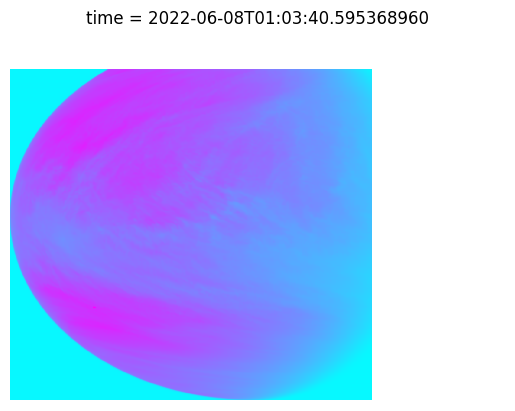

In [46]:
fig, axes = plt.subplots(ncols=1)

xr_data['radiance'].plot(ax=axes,
                         vmin=0, 
                         #vmax=2.5e8, 
                         xlim=[xr_data['epx'].min(),xr_data['epx'].max()], 
                         ylim=[xr_data['epy'].min(),xr_data['epy'].max()],
                         cmap='cool',
                         add_colorbar=False)

axes.set_axis_off()

fig.savefig('output/'+file.split('/')[-1].split(".")[0]+'.jpg')

#plt.close(fig)